In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
cat = ["sex","children","smoker","region"]
num = ["age","bmi","charges"]

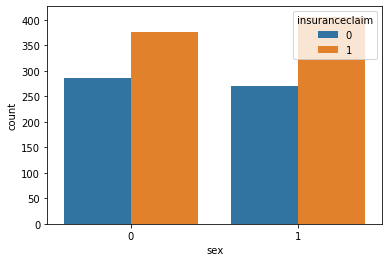

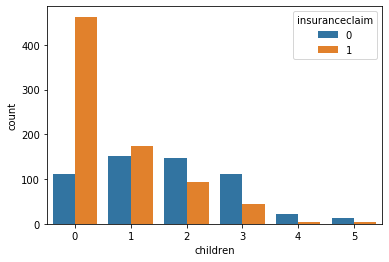

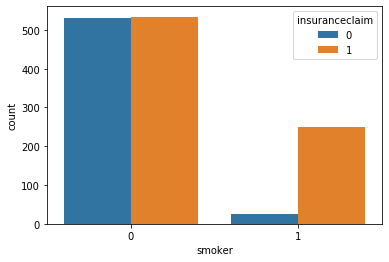

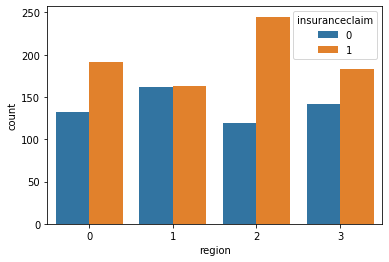

In [15]:
for col in cat:
    plt.figure()
    sns.countplot(data=df,x=col,hue="insuranceclaim")
    plt.show()

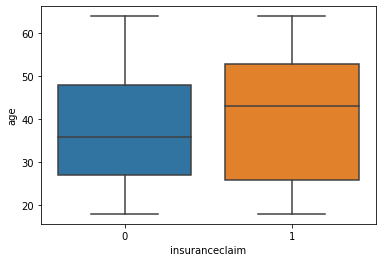

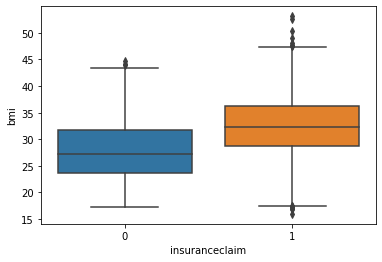

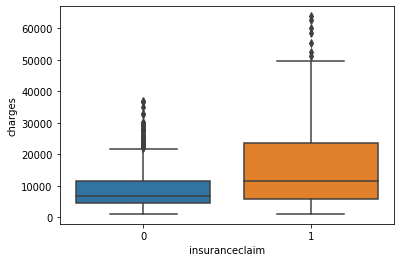

In [9]:
for col in num:
    plt.figure()
    sns.boxplot(data=df,y=col,x="insuranceclaim")
    plt.show()

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
dt = DecisionTreeClassifier()

In [13]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = dt.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [17]:
#df.iloc[4,6]

3866.8552

In [18]:
#df.iloc[2,4]

0

In [19]:
#df.iloc[2:10,1:4]

,sex,bmi,children
2,1,33.000,3
3,1,22.705,0
4,1,28.880,0
5,0,25.740,0
6,0,33.440,1
7,0,27.740,3
8,1,29.830,2
9,0,25.840,0


In [20]:
'''
df.iloc[:,:]
select all row
select all col

df.iloc[:,:-1]
dont select last col

df.iloc[:,-1]
'''

'df.iloc[:,:]\nselect all row\nselect all col\n\ndf.iloc[:,:-1]\ndont select last col\n\ndf.iloc[:,-1]'

In [21]:
#df.iloc[:,:-1]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [22]:
#df.iloc[:,-1]

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [23]:
file = open("model.ser","wb")
# wb write binary

In [24]:
pickle.dump(dt,file)
# dump = dump is import from pickle, taking decision tree and put in file

In [25]:
file.close()